### Task 04: Sentiment Analysis & Visualization

In [2]:
!pip install wordcloud

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.0 kB 217.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.0 kB 217.9 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 327.7 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 360.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.5 MB 2.2 MB/s eta 0:00:08
   - -------------------------------------- 0.4/15.5 MB 4.0 MB/s eta 0:00:04
   - -------------------------------------- 0.6/15.5 MB 4.4 MB/s eta 0:00:04
   -- ------------------------------------- 0.9/15.5 MB 4.9 MB/s eta 0:00:03
   --- ------------------------------------ 1.2/15.5 MB 5.1 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/15.5 MB 5.6 MB/s eta 0:00:03
   

  You can safely remove it manually.
  You can safely remove it manually.


In [3]:
pip install --upgrade numpy

  Using cached numpy-2.4.0-cp312-cp312-win_amd64.whl.metadata (6.6 kB)
Using cached numpy-2.4.0-cp312-cp312-win_amd64.whl (12.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.4.0 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.4.0 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.4.0 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.4.0 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.4.0 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.4.0 which is incompatible.


### Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

### Load the dataset

In [3]:
df = pd.read_csv("twitter_training.csv", header=None)

# Assign column names
df.columns = ["id", "topic", "sentiment", "text"]

# Check first few rows
df.head()

,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


### Basic Info

In [5]:
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   topic      74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


id             0
topic          0
sentiment      0
text         686
dtype: int64

### Basic sentiment distribution

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2516\3756650822.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, order=df["sentiment"].value_counts().index,palette="viridis")


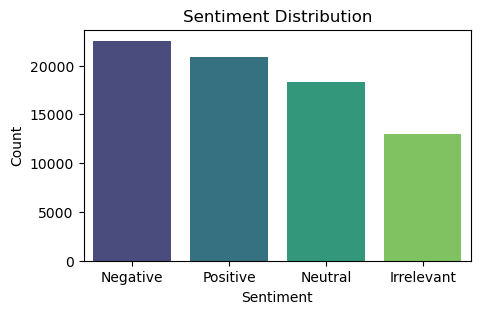

In [7]:
plt.figure(figsize=(5,3))
sns.countplot(x="sentiment", data=df, order=df["sentiment"].value_counts().index,palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

### Sentiment Distribution by Topic

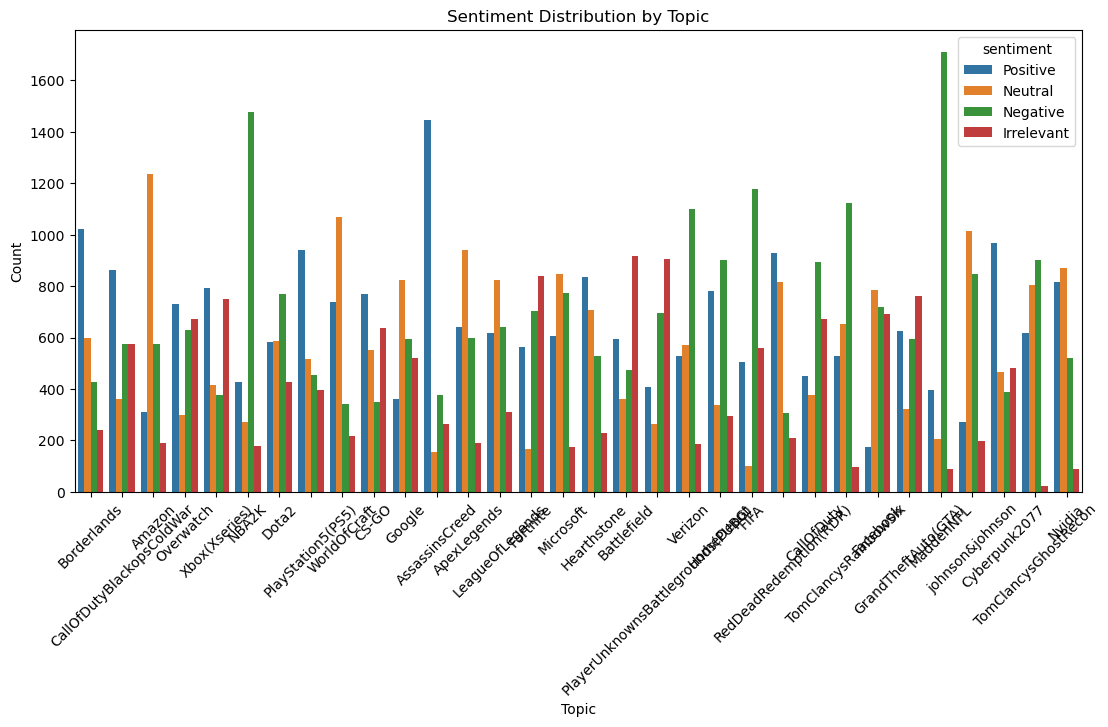

In [37]:
plt.figure(figsize=(13,6))
sns.countplot(
    x="topic",
    hue="sentiment",
    data=df
)
plt.xticks(rotation=45)
plt.title("Sentiment Distribution by Topic")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.show()

### Text cleaning function

In [9]:
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r"http\S+", "", text)   # remove URLs
        text = re.sub(r"@\w+", "", text)      # remove mentions
        text = re.sub(r"[^A-Za-z\s]", "", text)  # remove special characters
        text = text.lower()                   # convert to lowercase
        return text
    else:
        return ""

# Apply cleaning
df["clean_text"] = df["text"].astype(str).apply(clean_text)


### WordCloud for Positive & Negative Tweets

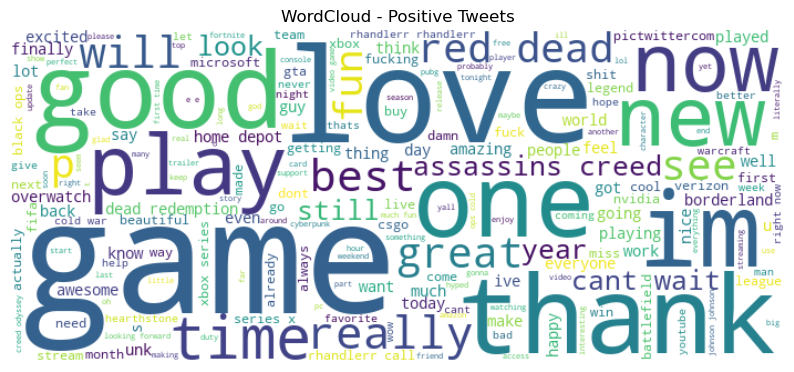

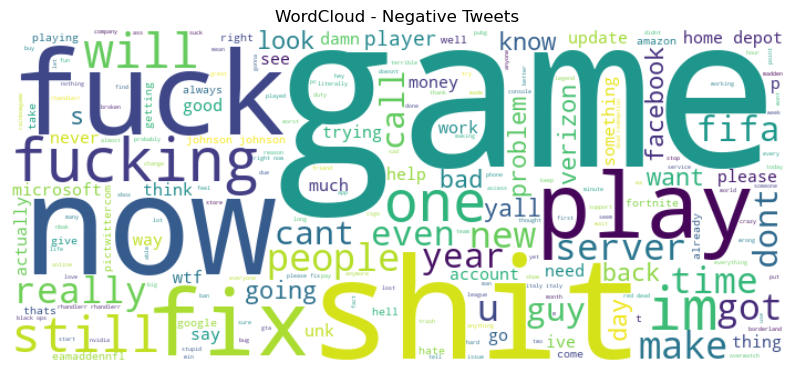

In [13]:
for sentiment in ["Positive", "Negative"]:
    text = " ".join(df[df["sentiment"] == sentiment]["clean_text"])
    
    wordcloud = WordCloud(
        width=700,
        height=300,
        background_color="white"
    ).generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud - {sentiment} Tweets")
    plt.show()


### Top Words in Each Sentiment

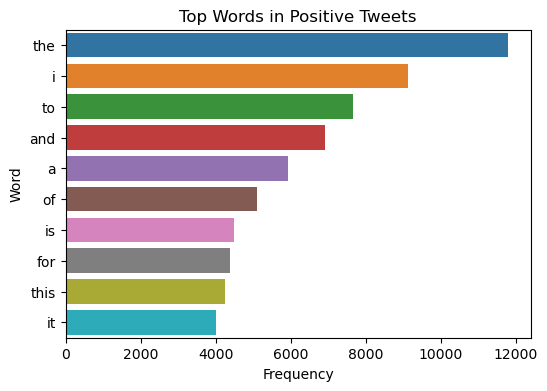

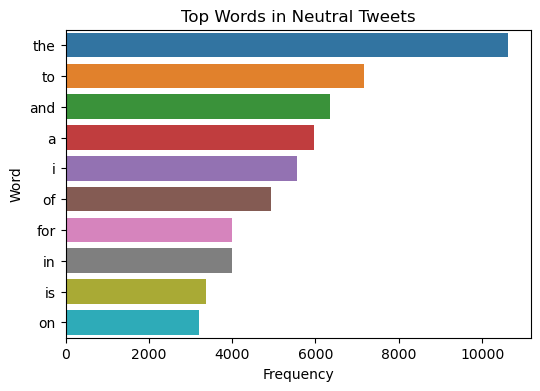

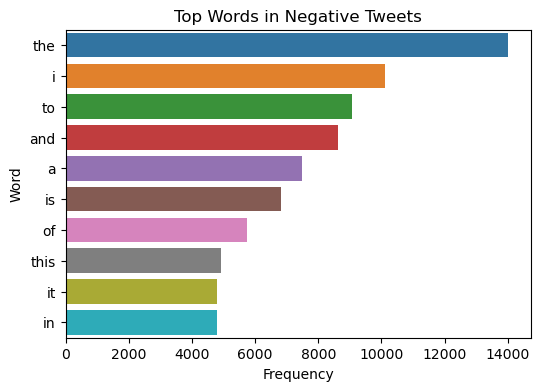

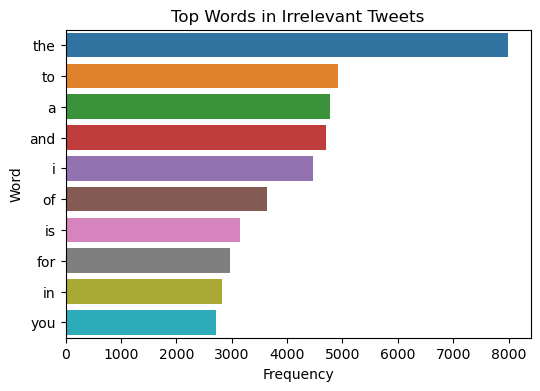

In [19]:
from collections import Counter
import seaborn as sns

for sentiment in df["sentiment"].unique():
    words = " ".join(df[df["sentiment"] == sentiment]["clean_text"]).split()
    counter = Counter(words)

    common_words = pd.DataFrame(
        counter.most_common(10),
        columns=["Word", "Frequency"]
    )

    plt.figure(figsize=(6,4))
    sns.barplot(
        x="Frequency",
        y="Word",
        data=common_words,
        hue="Word",
        legend=False
    )
    plt.title(f"Top Words in {sentiment} Tweets")
    plt.show()
